In [1]:
import turicreate as tc
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 데이터셋 읽어오기
data = make_moons(n_samples=200, shuffle=True, noise=0.1, random_state=19)
data = tc.SFrame(data[0]).unpack('X1')

# 데이터셋 확인
data.explore()

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Materializing SFrame

In [2]:
# DBSCAN 모델학습
dbscan_model = tc.dbscan.create(data, radius=0.25)

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8190

number of reference data blocks: 8

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1875    | 8.33333     | 499us        |

| 22500   | 100         | 4.21ms       |

+---------+-------------+--------------+

[INFO] turicreate.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] turicreate.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 1044                        |

| 0                           |

+-----------------------------+

[INFO] turicreate.toolkits.clustering.dbscan: Processing boundary points.


In [3]:
# 데이터별 클러스터ID 표시
cluster_id = dbscan_model.cluster_id
cluster_id = cluster_id.sort('cluster_id') # 정렬

# 데이터셋 확인
cluster_id.explore()

Materializing SFrame

In [4]:
# dataにcluster_id을 연결
data = data.add_row_number('row_id')
data = data.join(dbscan_model.cluster_id, on='row_id', how='left')

# 데이터셋 확인
data.explore()

Materializing SFrame

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


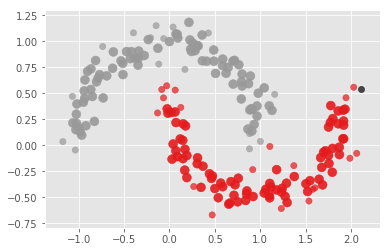

In [5]:
# 플롯 스타일 지정
plt.style.use('ggplot')

# Core Point、Boundary Point Noise、Point 배열생성
core_mask = data['type'] == 'core'
boundary_mask = data['type'] == 'boundary'
noise_mask = data['type'] == 'noise'

# 플롯시작
fig, ax = plt.subplots()

# 산포도 그리기
ax.scatter(data['X1.0'][core_mask], data['X1.1'][core_mask], s=80, 
    alpha=0.9, c=data['cluster_id'][core_mask], cmap=plt.cm.Set1)
ax.scatter(data['X1.0'][boundary_mask], data['X1.1'][boundary_mask], s=40,
    alpha=0.7, c=data['cluster_id'][boundary_mask], cmap=plt.cm.Set1)
ax.scatter(data['X1.0'][noise_mask], data['X1.1'][noise_mask], s=40, 
    alpha=0.7, c='black')

# 플롯표시
fig.show()

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 122       |

| 1             | 85        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 20                            |

| 2         | 2                             |

| 3         | 1                             |

| 4         | 0                             |

+-----------+-------------------------------+

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


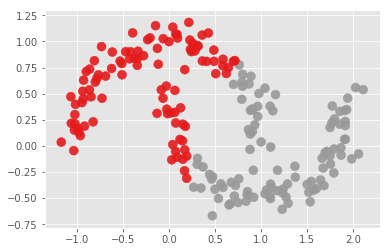

In [6]:
# k평균법 학습
kmeans_model = tc.kmeans.create(data, features=['X1.0', 'X1.1'], num_clusters=2)

# kmeans_id열 추가
data['kmeans_id'] = kmeans_model.cluster_id['cluster_id']

# 플롯
fig, ax = plt.subplots()
ax.scatter(data['X1.0'], data['X1.1'], s=80, alpha=0.9, c=data['kmeans_id'],
    cmap=plt.cm.Set1)
fig.show()